In [1]:
# IMPORT LIBRARIES

import numpy as np													# Numerical computations
import pandas as pd 												# Data structures
import matplotlib.pyplot as plt										# Statistic visualizations
from pandas.plotting import scatter_matrix							# Scatter matrix
import seaborn as sns												# Statistic visualizations
import statsmodels.api as sm										# Model construction
from scipy import stats			                                    # Statistics
import statsmodels.api as sm                                        # Model construction
from sklearn.linear_model import LinearRegression					# Regression model
from sklearn.preprocessing import MinMaxScaler                      # Assigns numeric ranges 0-1
from sklearn.ensemble import RandomForestRegressor					# Decision Trees
from sklearn.model_selection import train_test_split				# Test models
from sklearn.metrics import root_mean_squared_error, r2_score		# Model accuracy

## Load and Inspect

In [2]:
# Import data

df = pd.read_csv("data/data.csv")
df.head(3)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0


In [3]:
# Review data

display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


None

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [4]:
# FICO Range is a string, but customers will have a single score. Each range is represented by its average.

df['fico_score'] = df['fico_range'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2))

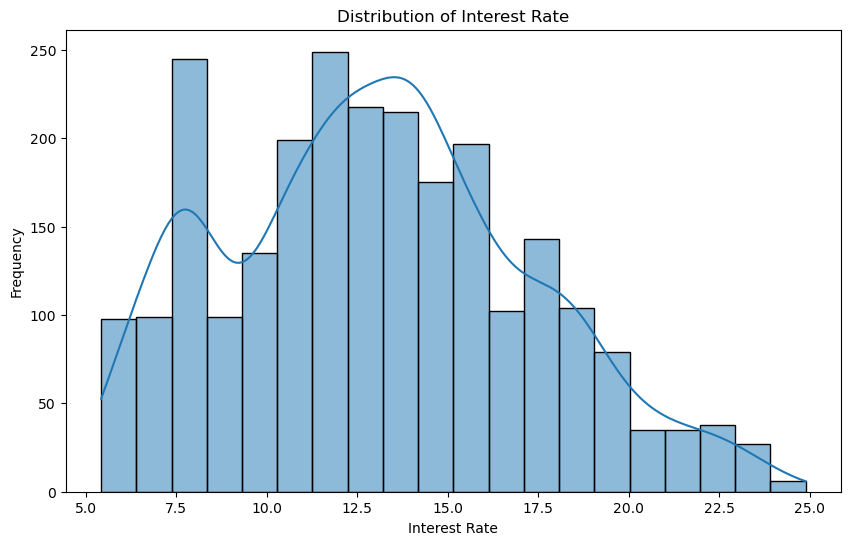

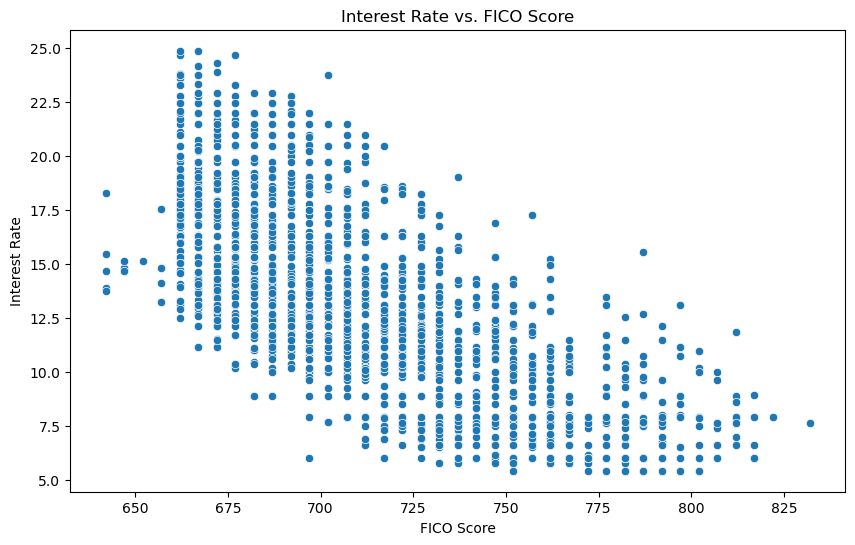

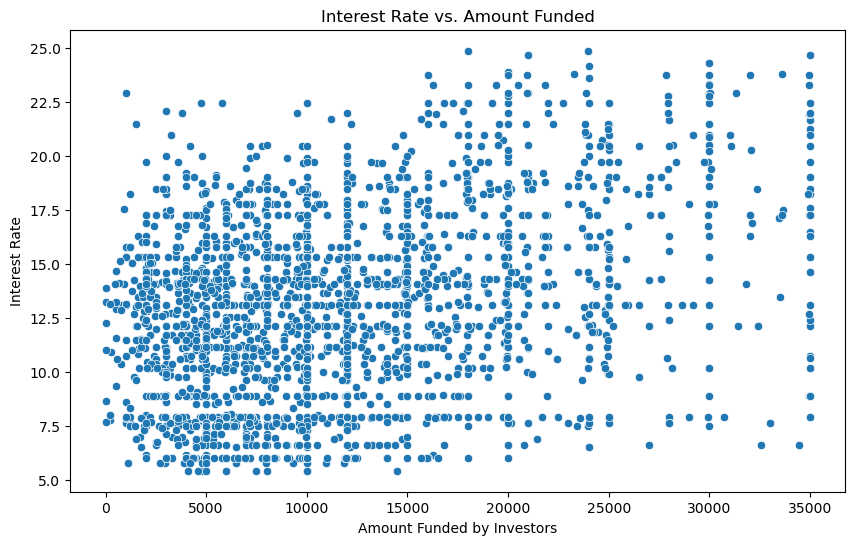

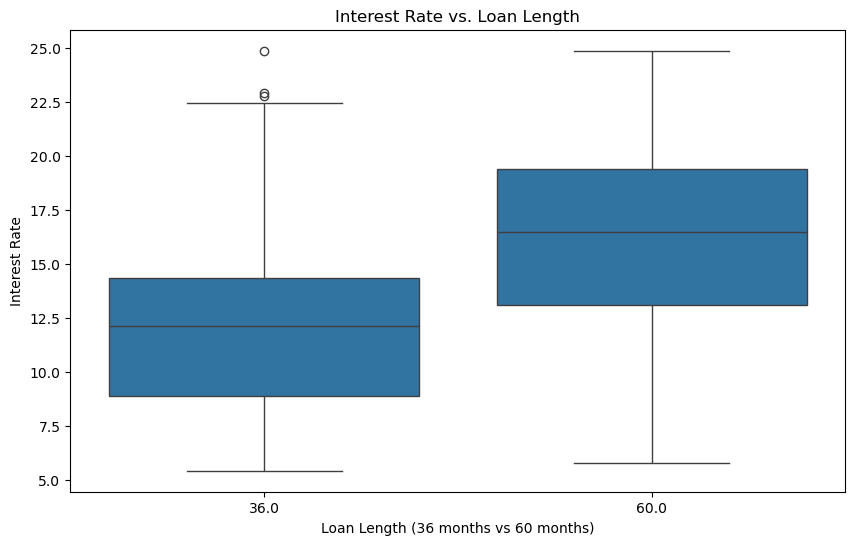

In [5]:
# Customers are interested in our rates, so we will compare interest rate to our other features.

# Distribution of 'interest_rate'
plt.figure(figsize=(10, 6))
sns.histplot(df['interest_rate'], kde=True, bins=20)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# Rate vs FICO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['fico_score'], y=df['interest_rate'])
plt.title('Interest Rate vs. FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')

# Rate to Amount Funded
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['amount_funded_by_investors'], y=df['interest_rate'])
plt.title('Interest Rate vs. Amount Funded')
plt.xlabel('Amount Funded by Investors')
plt.ylabel('Interest Rate')

# 4. Relationship between 'interest_rate' and 'loan_length'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_length'], y=df['interest_rate'])
plt.title('Interest Rate vs. Loan Length')
plt.xlabel('Loan Length (36 months vs 60 months)')
plt.ylabel('Interest Rate')

plt.show()


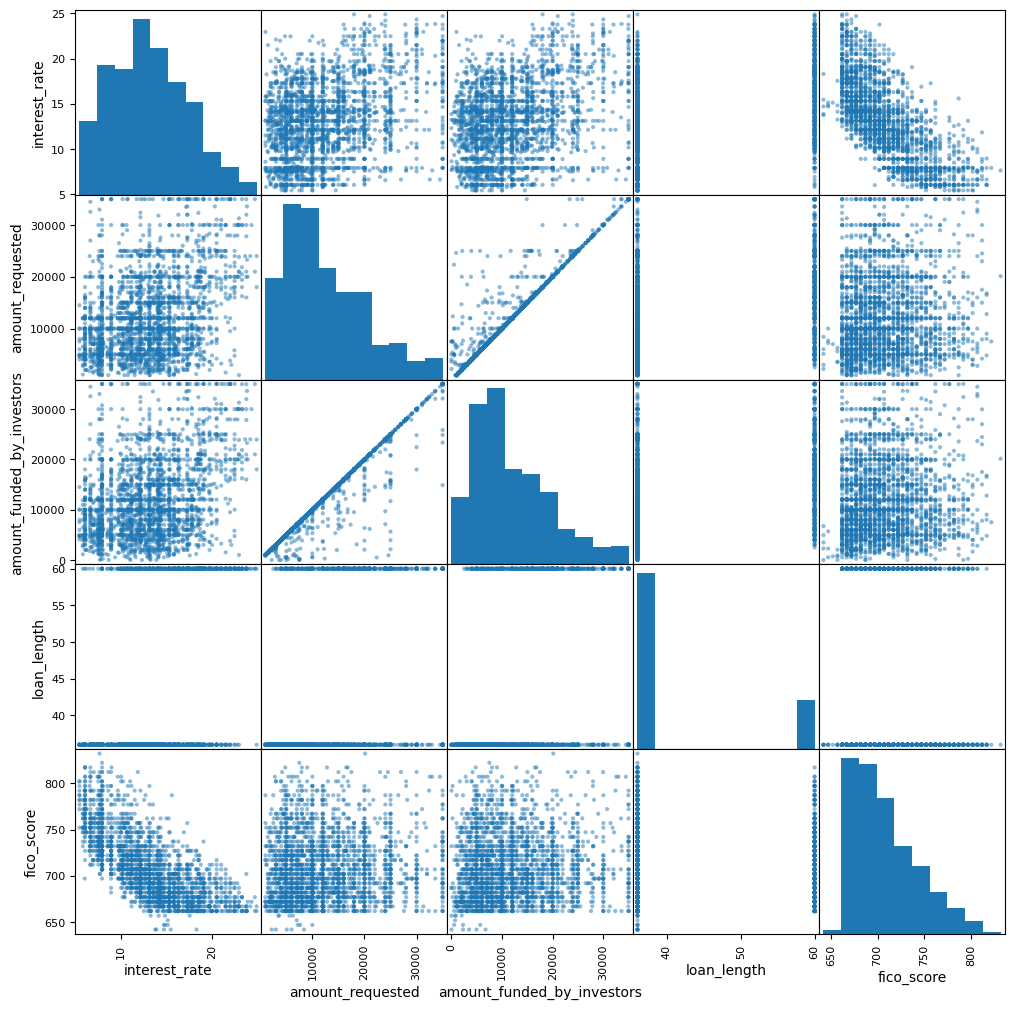

In [6]:
scatter_matrix(df, figsize=(12, 12))
plt.show()

In [7]:
# Make column as fico scores into ordinal (?) data (Need dictionary or some mapping of each range to its value?) -----DONE
	# ANSWER - Instead of assigning an ordinal number to represent a FICO range, I decided each range can be represented by the avg in that range. This can be converted in the model with MinMaxScaler

# Turn loan length data into encoded data (0 and 1 for 3 years and 5 years) -----DONE
	# ANSWER - One Hot Encoding wasn't needed. We verified only two values, which was transformed to 0/1 during MinMaxScaler

# Create new column of percentage funded

# Rerun scatter matrix

# Drop the amount requested in lieu of amount funded -----DONE
	# Column wasn't deleted, but was not included when defining 'X'

# Scale data to fit 0 - 1 -----DONE
	# Via MinMaxScaler

# Run Linear Regression model

	# Training test

	# Get R2 value

	# OLS with Statsmodels to get the helpful table

# Draw scatter plot with red horizontal line

# Strongest relationships or predicitve potential. Add visualizations

# Practical guidance to business owners

	# Human-readable plots

## Apply Model

#### Build and Train

In [8]:
# Setting feature and target variables

X = df[['amount_funded_by_investors', 'loan_length', 'fico_score']]
y = df['interest_rate']

In [9]:
# Splitting data into groups before fitting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.255, random_state=42)

In [10]:
# Apply Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate

In [11]:
# Formulate predictions on the test data

y_pred = model.predict(X_test)
np.round(y_pred, 2)

# R2 Score

print(f"Test R-squared Score: {model.score(X_test, y_test):.4f}\n")
print(f"Model Coefficients:\n{pd.Series(model.coef_, index=X_train.columns)}")

# The amount funded has a small but logicial positive correlation with rate. Larger loans tend to have higher rates of interest to offset associated risk.
# Loan length has a small but positive correlation to interest rate. Longer loans represent uncertainty to lenders, which a slight increase in rate helps to mitigate.
# FICO score has a strong correlation (negative) with interest rate. Customers with higher scores tend to receive lower interest rates.

# FICO range and Amount Requested were excluded from the model to avoid multicollinearity.

Test R-squared Score: 0.7502

Model Coefficients:
amount_funded_by_investors    0.000135
loan_length                   0.139039
fico_score                   -0.087456
dtype: float64


#### Visualize

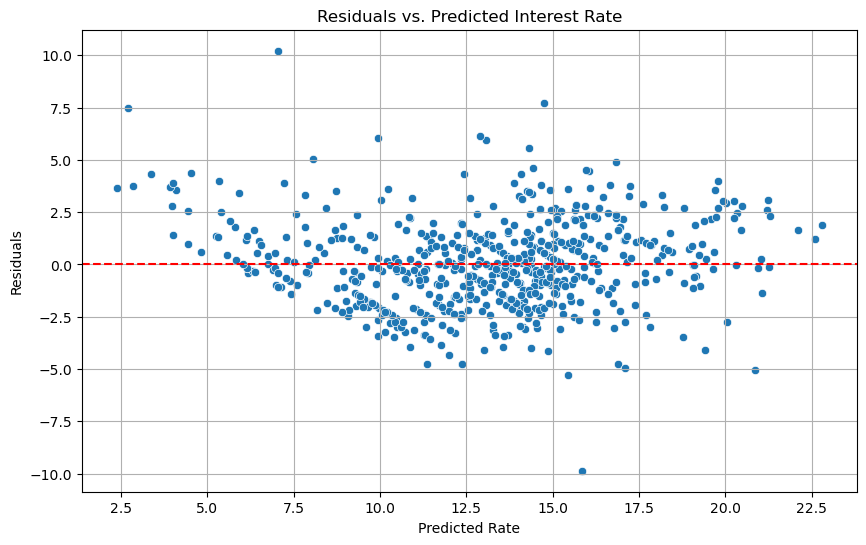

In [12]:
# Residuals
y_residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Interest Rate')
plt.xlabel('Predicted Rate')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Residuals appear distributed around zero without a distinct pattern, leaning toward homoscedasticity and suggesting a good fit for Linear Regression.

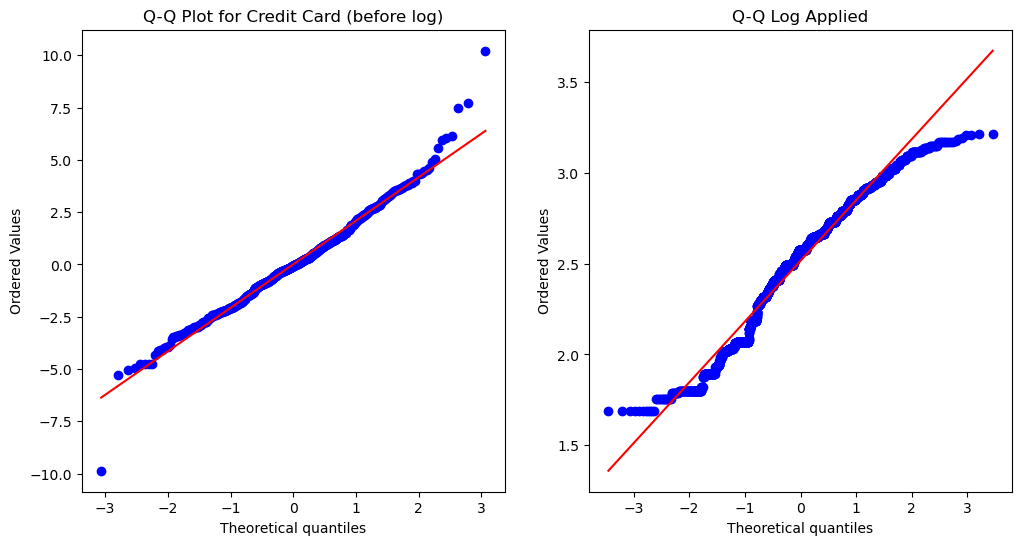

In [ ]:
# QQ Plots

y_log = np.log(df["interest_rate"])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(y_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Interest Rate Residuals")

plt.subplot(1, 2, 2)
stats.probplot(y_log, dist="norm", plot=plt)
plt.title("Q-Q Log Applied")

plt.show()

In [14]:
# OPTIONAL - Apply Regression with Statsmodels to get OLS table

X_2 = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_2).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1794.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:45:21   Log-Likelihood:                -4033.7
No. Observations:                1861   AIC:                             8075.
Df Residuals:                    1857   BIC:                             8097.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Test Model

In [15]:
test_funded = 25000
test_length = 36
test_fico = 800

test_vars = np.array([[test_funded, test_length, test_fico]])
test_terms = pd.DataFrame(test_vars, columns = ['amount_funded_by_investors', 'loan_length', 'fico_score'])
predicted_rate = model.predict(test_terms)

print(f"A {test_length} month loan for ${test_funded} to a customer with a FICO score of {test_fico}:\nPredicted interest rate: {predicted_rate[0]:,.2f}%")

A 36 month loan for $25000 to a customer with a FICO score of 800:
Predicted interest rate: 6.04%


Interest Rate Calculator

In [23]:
def loan_interest_calculator(model,
                             min_fico=300,
                             max_fico=850,
                             min_rate=5.0,
                             max_rate=25.0):

    # --- LOAN AMOUNT ---
    while True:
        try:
            test_funded = float(input("Enter the loan amount you want: "))
            break
        except:
            print("ERROR: Please enter a valid number.\n")

    # --- LOAN LENGTH ---
    while True:
        try:
            test_length = int(input("Enter the loan length in months (e.g., 36 or 60): "))
            break
        except:
            print("ERROR: Please enter a valid whole number.\n")

    # --- FICO SCORE (loop until valid) ---
    while True:
        try:
            test_fico = int(input(f"Enter your FICO score ({min_fico}-{max_fico}): "))

            if test_fico < min_fico or test_fico > max_fico:
                print(f"ERROR: FICO must be between {min_fico} and {max_fico}. Try again.\n")
            else:
                break  # valid → exit loop

        except ValueError:
            print("ERROR: Please enter a valid number.\n")

    # --- BUILD DATAFRAME FOR MODEL ---
    test_vars = np.array([[test_funded, test_length, test_fico]])
    test_terms = pd.DataFrame(
        test_vars,
        columns=['amount_funded_by_investors', 'loan_length', 'fico_score']
    )

    # --- PREDICT ---
    base_pred = float(model.predict(test_terms)[0])

    # --- ENFORCE INTEREST RATE BOUNDS ---
    final_rate = np.clip(base_pred, min_rate, max_rate)

    # --- OUTPUT ---
    print("\n------ Loan Interest Result ------")
    print(f"Loan Amount:       ${test_funded:,.0f}")
    print(f"Loan Length:       {test_length} months")
    print(f"FICO Score:        {test_fico}")
    print(f"Raw Model Rate:    {base_pred:.2f}%")
    print(f"Final Bounded Rate (5%–25%): {final_rate:.2f}%")
    print("---------------------------------\n")

    return final_rate

In [29]:
loan_interest_calculator(model)


------ Loan Interest Result ------
Loan Amount:       $20,000
Loan Length:       60 months
FICO Score:        620
Raw Model Rate:    24.44%
Final Bounded Rate (5%–25%): 24.44%
---------------------------------



np.float64(24.43770948479586)